In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv("/content/drive/MyDrive/DU Data Analytics Course/Project_4/project_4_car_sale_pricing_models/Resources/original_label_encoded.csv")

In [3]:
df

,Unnamed: 0,make,model,body,state,color,interior,condition,odometer,car_age,mmr,sellingprice
0,0,0,0,0,0,0,0,0,0,0,0,21500.0
1,1,0,0,0,0,0,1,0,1,0,1,21500.0
2,2,1,1,1,0,1,0,1,2,1,2,30000.0
3,3,2,2,1,0,0,0,2,3,2,3,27750.0
4,4,1,3,1,0,1,0,3,4,2,4,67000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
533643,558832,0,26,1,16,4,0,1,35094,2,902,33000.0
533644,558833,32,213,6,28,0,0,0,35421,4,31,30800.0
533645,558834,1,41,0,0,2,0,9,151441,4,196,34000.0
533646,558835,3,4,27,13,0,0,14,74972,2,175,11100.0


In [4]:
df.dtypes

Unnamed: 0        int64
make              int64
model             int64
body              int64
state             int64
color             int64
interior          int64
condition         int64
odometer          int64
car_age           int64
mmr               int64
sellingprice    float64
dtype: object

In [5]:
df.columns

Index(['Unnamed: 0', 'make', 'model', 'body', 'state', 'color', 'interior',
       'condition', 'odometer', 'car_age', 'mmr', 'sellingprice'],
      dtype='object')

In [6]:
features = ['make', 'model', 'body', 'condition', 'odometer', 'mmr', 'car_age']

In [7]:
df.dropna(subset=features, inplace=True)

In [8]:
df.head()

,Unnamed: 0,make,model,body,state,color,interior,condition,odometer,car_age,mmr,sellingprice
0,0,0,0,0,0,0,0,0,0,0,0,21500.0
1,1,0,0,0,0,0,1,0,1,0,1,21500.0
2,2,1,1,1,0,1,0,1,2,1,2,30000.0
3,3,2,2,1,0,0,0,2,3,2,3,27750.0
4,4,1,3,1,0,1,0,3,4,2,4,67000.0


In [9]:
X = df.drop(['sellingprice'], axis=1)
y = df['sellingprice']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [16]:
# Define a range of k values to search
param_grid = {'n_neighbors': np.arange(1, 21)}

# Create KNN model
knn = KNeighborsRegressor()

# Grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best k value
best_k = grid_search.best_params_['n_neighbors']
print("Best k value:", best_k)

# Evaluate model with best k value
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error with best k:", mse)

Best k value: 9
Mean Squared Error with best k: 66380723.29888943


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
k = 5
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [13]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 40774417.277253255


In [15]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 4014.9987238826943


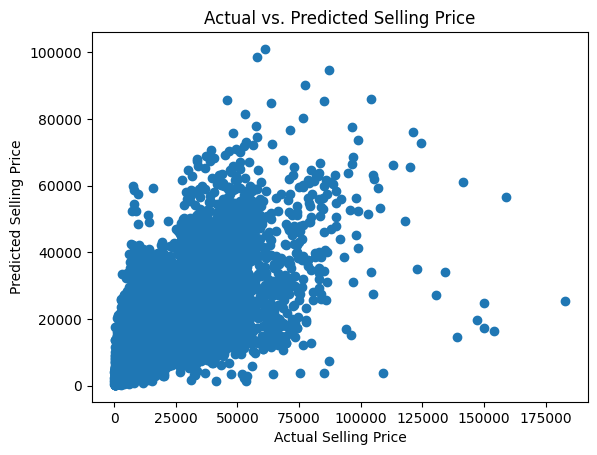

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Price')
plt.show()